# Fermipy tools to improve a model

In this notebook I show how to use Fermipy in order to improve the model for an roi. This is done in a ROI centered on M31 (Andromeda Galaxy).

I report below the configuration file that we are going to use.

We first import a few packages:

In [30]:
%matplotlib inline

import os
import numpy as np
from fermipy.gtanalysis import GTAnalysis
from fermipy.plotting import ROIPlotter, SEDPlotter
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Image
from math import *

We can save in the folder this configuration file making

In [13]:
if os.path.isfile('../data/M31_data.tar.gz'):
    !tar xzf ../data/M31_data.tar.gz
else:
    !curl -OL https://raw.githubusercontent.com/fermiPy/fermipy-extras/master/data/M31_data.tar.gz
    !tar xzf M31_data.tar.gz

In [15]:
gta = GTAnalysis('config_M31.yaml')
matplotlib.interactive(True)
gta.setup()

2018-03-31 16:43:51 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 0.16.0+175.ge34f 
ScienceTools version ScienceTools-11-07-00
2018-03-31 16:43:53 INFO    GTAnalysis.setup(): Running setup.
2018-03-31 16:43:53 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2018-03-31 16:43:53 INFO    GTBinnedAnalysis.run_gtapp(): Running gtselect.
2018-03-31 16:43:53 INFO    GTBinnedAnalysis.run_gtapp(): time -p gtselect infile=/u/gl/mdimauro/dmcat/workdir/mattia/LogNLogS_Ebins/files_bins/bin031000/P8_SOURCE_zmax90_03_1000_gtselect.fits outfile=/nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/ft1_00.fits ra=10.6842382149 dec=41.2700468202 rad=8.98528137424 tmin=239557417.0 tmax=512994417.0 emin=300.0 emax=500000.0 zmin=0.0 zmax=105.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=3 clobber=yes debug=no gui=no mode="ql"
2018-03-31 16:46:58 INFO    GTBin

2018-03-31 16:53:18 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0105.3+3928
2018-03-31 16:53:18 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0023.5+4454
2018-03-31 16:53:18 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0102.1+4458
2018-03-31 16:53:18 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0022.7+4651
2018-03-31 16:53:18 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named isodiff
2018-03-31 16:53:18 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named galdiff
2018-03-31 16:53:18 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 3FGL J0022.7+4651....................!
2018-03-31 16:53:18 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 3FGL J0023.5+4454....................!
2018-03-31 16:53:18 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 3FGL J0032.5+3912....................!
2018-03-31 16:53:18 INFO    GTBinnedAnalysis.run_gtapp(): Generati

The model includes the IEM, isotropic template and 3FGL sources. 

In [16]:
gta.print_model()

2018-03-31 16:55:02 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.049   2.409  1.99e-06   2.56       nan       707.1     
3FGL J0040.3+4049      0.640   0.422   6.4e-06   1.13       nan        52.4     
3FGL J0049.0+4224      1.635   0.856  3.11e-06   1.77       nan       223.6     
3FGL J0048.0+3950      1.745   0.429  4.65e-06   1.88       nan       461.3     
3FGL J0039.1+4330      2.326   0.445  2.67e-06   1.96       nan       346.5     
3FGL J0032.5+3912      2.825   0.791  1.28e-06   2.56       nan       444.1     
3FGL J0102.3+4217      3.800   0.982  2.94e-06   2.69       nan      1139.8     
3FGL J0041.9+3639      4.611   1.768   1.7e-06   1.98       nan       205.6     
3FGL J0105.3+3928      4.661   0.591  2.43e-06   2.33       nan       614.4     
3FGL J0023.5+4454      5.052   2.474  2.49e-06   2.57 

We will make first a fit of the roi. I free sources and then I use gta.optimize()

In [17]:
gta.free_sources()
gta.optimize()

2018-03-31 16:56:00 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0042.5+4117     : ['Prefactor', 'Index']
2018-03-31 16:56:00 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0040.3+4049     : ['Prefactor', 'Index']
2018-03-31 16:56:00 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0049.0+4224     : ['Prefactor', 'Index']
2018-03-31 16:56:00 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0048.0+3950     : ['Prefactor', 'Index']
2018-03-31 16:56:00 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0039.1+4330     : ['Prefactor', 'Index']
2018-03-31 16:56:00 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0032.5+3912     : ['Prefactor', 'Index']
2018-03-31 16:56:00 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0102.3+4217     : ['Prefactor', 'Index']
2018-03-31 16:56:00 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0041.9+3639     : ['Prefactor', 'Index']
2018-03-

Joint fit  ['galdiff', 'isodiff']


/u/gl/mdimauro/kipac/software/anaconda/lib/python2.7/site-packages/scipy/interpolate/fitpack2.py:226: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape galdiff TS:   5052.125
Fitting shape isodiff TS:   1305.996
Fitting shape 3FGL J0048.0+3950 TS:    450.476
Fitting shape 3FGL J0023.5+4454 TS:    200.014
Fitting shape 3FGL J0105.3+3928 TS:    180.109
Fitting shape 3FGL J0102.3+4217 TS:    161.168
Fitting shape 3FGL J0042.5+4117 TS:    101.650
Fitting shape 3FGL J0041.9+3639 TS:     72.654
Fitting shape 3FGL J0039.1+4330 TS:     71.413
Fitting shape 3FGL J0040.3+4049 TS:     55.198
Fitting shape 3FGL J0049.0+4224 TS:     36.209
Fitting shape 3FGL J0032.5+3912 TS:     26.955


2018-03-31 16:56:24 INFO    GTAnalysis.optimize(): Finished
2018-03-31 16:56:24 INFO    GTAnalysis.optimize(): LogLike: -241428.100799 Delta-LogLike: 486.588669
2018-03-31 16:56:24 INFO    GTAnalysis.optimize(): Execution time: 24.44 s


{'config': {'max_free_sources': 5,
  'npred_frac': 0.95,
  'npred_threshold': 1.0,
  'optimizer': {'init_lambda': 0.0001,
   'max_iter': 100,
   'min_fit_quality': 2,
   'optimizer': 'MINUIT',
   'retries': 3,
   'tol': 0.001,
   'verbosity': 0},
  'shape_ts_threshold': 25.0,
  'skip': []},
 'dloglike': 486.58866886023316,
 'loglike0': -241914.68946829514,
 'loglike1': -241428.1007994349}

Then, I use gta.fit() to make a more robust fit.

In [18]:
gta.fit()
gta.print_model()
gta.write_roi('initial',make_plots=True,save_model_map=True)

2018-03-31 16:57:16 INFO    GTAnalysis.fit(): Starting fit.
2018-03-31 16:59:32 ERROR   GTAnalysis.fit(): MINUIT failed with status code 102 fit quality 2
2018-03-31 16:59:32 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.049   2.232  1.56e-06   2.77    100.16       650.2    *
3FGL J0040.3+4049      0.640   0.207  1.85e-06   1.76     65.34       129.4    *
3FGL J0049.0+4224      1.635   0.345  1.21e-06   1.78     33.11        92.7    *
3FGL J0048.0+3950      1.745   0.558  5.65e-06   1.92    438.69       627.5    *
3FGL J0039.1+4330      2.326   0.256  1.49e-06   1.98     67.02       203.2    *
3FGL J0032.5+3912      2.825   0.485  6.82e-07   2.87     22.82       293.3    *
3FGL J0102.3+4217      3.800   0.744  1.88e-06   2.87    159.25       813.8    *
3FGL J0041.9+3639      4.611   1.679  1.32e-06   2.33     73.

We see how the model is a good representation of the ROI computing the TS map using gta.tsmap.

2018-03-31 16:59:56 INFO    GTAnalysis.tsmap(): Generating TS map
2018-03-31 17:00:02 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2018-03-31 17:05:05 INFO    GTAnalysis.tsmap(): Finished TS map
2018-03-31 17:05:05 INFO    GTAnalysis.tsmap(): Execution time: 308.46 s


Text(0.5,1,u'NPred')

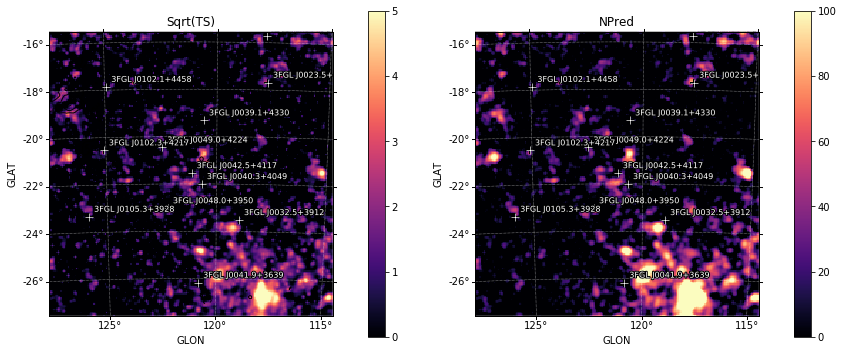

In [19]:
tsmap_postfit = gta.tsmap(prefix='TSmap_start',make_plots=True,write_fits=True,write_npy=True)
%matplotlib inline
fig = plt.figure(figsize=(14,6))
ROIPlotter(tsmap_postfit['sqrt_ts'],roi=gta.roi).plot(levels=[0,3,5,7],vmin=0,vmax=5,subplot=121,cmap='magma')
plt.gca().set_title('Sqrt(TS)')
ROIPlotter(tsmap_postfit['npred'],roi=gta.roi).plot(vmin=0,vmax=100,subplot=122,cmap='magma')
plt.gca().set_title('NPred')

Then, we can use the tool gta.residmap to calculatge the residuals.

2018-03-31 17:08:16 INFO    GTAnalysis.residmap(): Generating residual maps
2018-03-31 17:08:16 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2018-03-31 17:08:20 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2018-03-31 17:08:26 INFO    GTAnalysis.residmap(): Finished residual maps
2018-03-31 17:08:26 INFO    GTAnalysis.residmap(): Execution time: 10.26 s


Text(0.5,1,u'Excess')

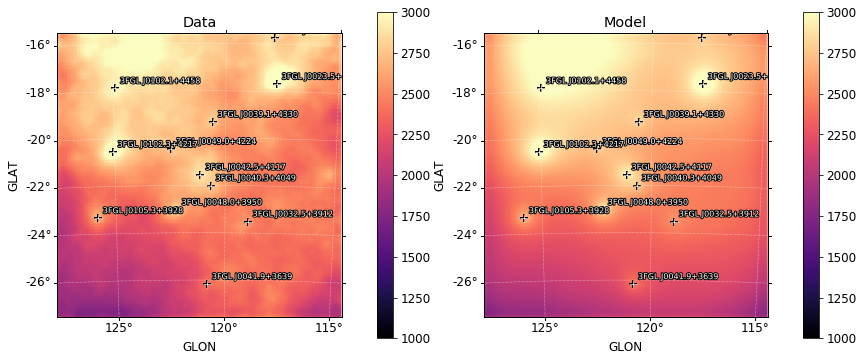

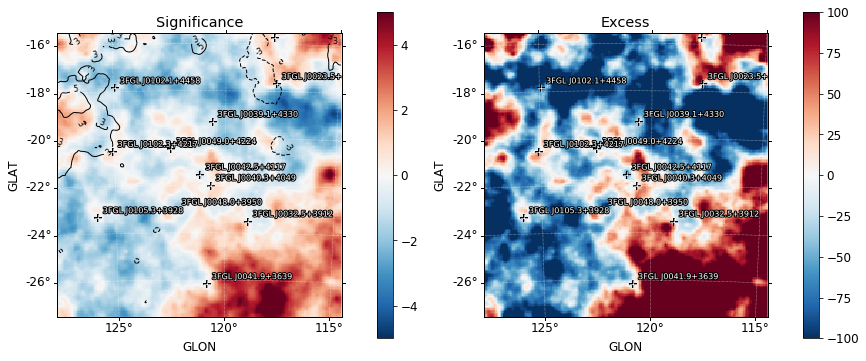

In [25]:
resid = gta.residmap('SMC_postfit',model={'SpatialModel' : 'PointSource', 'Index' : 2.0},write_fits=True,write_npy=True,make_plots=True)
fig = plt.figure(figsize=(14,6))
ROIPlotter(resid['data'],roi=gta.roi).plot(vmin=1000,vmax=3000,subplot=121,cmap='magma')
plt.gca().set_title('Data')
ROIPlotter(resid['model'],roi=gta.roi).plot(vmin=1000,vmax=3000,subplot=122,cmap='magma')
plt.gca().set_title('Model')

fig = plt.figure(figsize=(14,6))
ROIPlotter(resid['sigma'],roi=gta.roi).plot(vmin=-5,vmax=5,levels=[-5,-3,3,5],subplot=121,cmap='RdBu_r')
plt.gca().set_title('Significance')
ROIPlotter(resid['excess'],roi=gta.roi).plot(vmin=-100,vmax=100,subplot=122,cmap='RdBu_r')
plt.gca().set_title('Excess')

As we can see there are large residuals in the TS map and in the residuals map. Therefore, we certainly have to improve our model.

In [32]:
gta.delete_sources(minmax_ts=[None,25])

2018-03-31 17:20:23 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0032.5+3912
2018-03-31 17:20:23 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0102.1+4458
2018-03-31 17:20:23 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0022.7+4651


In [31]:
gta.load_roi('initial')

2018-03-31 17:19:32 INFO    GTAnalysis.load_roi(): Loading ROI file: /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/initial.npy
2018-03-31 17:19:33 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2018-03-31 17:19:59 INFO    GTAnalysis.load_roi(): Finished Loading ROI


# Source Localization

The first thing to do in order to improve the model is to relocalize the sources of your model. In particular in our case where we have 3FGL source this is particularly requested.

The localize() method can be used to spatially localize a source. Localization is performed by scanning the likelihood surface in source position in a local patch around the nominal source position. The fit to the source position proceeds in two iterations:
TS Map Scan: Obtain a first estimate of the source position by generating a likelihood map of the region using the tsmap method. In this step all background parameters are fixed to their nominal values. The size of the search region used for this step is set with the dtheta_max parameter. Likelihood Scan: Refine the position of the source by performing a scan of the likelihood surface in a box centered on the best-fit position found in the first iteration. The size of the search region is set to encompass the 99% positional uncertainty contour. This method uses a full likelihood fit at each point in the likelihood scan and will re-fit all free parameters of the model. If a peak is found in the search region and the positional fit succeeds, the method will update the position of the source in the model to the new best-fit position.

We will localize all the sources in the model. We include a function to calculate the angular distance from two directions in the sky.

In [27]:
def angular_distance_gal(L_1,L_2,B_1,B_2):
    xx = sqrt(2.-2.*sin(B_1)*sin(B_2)-2.*cos(B_1)*cos(B_2)*cos(L_1-L_2))
    return xx

In [33]:
glon0 = np.zeros(len(gta.roi.sources))
glat0 = np.zeros(len(gta.roi.sources))
glon1 = np.zeros(len(gta.roi.sources))
glat1 = np.zeros(len(gta.roi.sources))
offset = np.zeros(len(gta.roi.sources))

for t in range(len(gta.roi.sources)-2):
    print ""
    print "Renormalization of source %s"%gta.roi.sources[t].name
    print ""
    glon0[t] = gta.roi[gta.roi.sources[t].name]['glon']
    glat0[t] = gta.roi[gta.roi.sources[t].name]['glat']
    gta.free_sources(free=False)
    gta.print_model()
    gta.free_sources(skydir=gta.roi[gta.roi.sources[t].name].skydir,distance=[3.0],free=True)
    gta.print_model()
    gta.localize(gta.roi.sources[t].name, update=True, make_plots=True)
    glon1[t] = gta.roi[gta.roi.sources[t].name]['glon']
    glat1[t] = gta.roi[gta.roi.sources[t].name]['glat']
    offset[t] = angular_distance_gal(glon0[t],glon1[t],glat0[t],glat1[t])
    gta.print_model()

2018-03-31 17:20:28 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0042.5+4117     : ['Prefactor', 'Index']
2018-03-31 17:20:28 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0040.3+4049     : ['Prefactor', 'Index']
2018-03-31 17:20:28 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0049.0+4224     : ['Prefactor', 'Index']
2018-03-31 17:20:28 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0048.0+3950     : ['Prefactor', 'Index']
2018-03-31 17:20:28 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0039.1+4330     : ['Prefactor', 'Index']
2018-03-31 17:20:28 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0102.3+4217     : ['Prefactor', 'Index']
2018-03-31 17:20:28 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0041.9+3639     : ['Prefactor', 'Index']
2018-03-31 17:20:28 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0105.3+3928     : ['Prefactor', 'Index']
2018-03-31 17:20


Renormalization of source 3FGL J0042.5+4117



2018-03-31 17:21:03 INFO    GTAnalysis._localize(): Localization succeeded.
2018-03-31 17:21:03 INFO    GTAnalysis._localize(): Updating source 3FGL J0042.5+4117 to localized position.
2018-03-31 17:21:03 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0042.5+4117
2018-03-31 17:21:03 INFO    GTAnalysis.add_source(): Adding source 3FGL J0042.5+4117
2018-03-31 17:21:08 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (   10.5251 +/-   0.0676,   41.2709 +/-   0.0597)
(glon,glat) = (  121.0455 +/-   0.0673,  -21.5667 +/-   0.0601)
offset =   0.0821 r68 =   0.0957 r95 =   0.1545 r99 =   0.1916
2018-03-31 17:21:08 INFO    GTAnalysis._localize(): LogLike:  -241448.921 DeltaLogLike:        0.119
2018-03-31 17:21:08 INFO    GTAnalysis.localize(): Finished localization.
2018-03-31 17:21:10 INFO    GTAnalysis.localize(): Execution time: 41.86 s
2018-03-31 17:21:10 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     in


Renormalization of source 3FGL J0040.3+4049



2018-03-31 17:22:06 INFO    GTAnalysis._localize(): Localization succeeded.
2018-03-31 17:22:06 INFO    GTAnalysis._localize(): Updating source 3FGL J0040.3+4049 to localized position.
2018-03-31 17:22:06 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0040.3+4049
2018-03-31 17:22:06 INFO    GTAnalysis.add_source(): Adding source 3FGL J0040.3+4049
2018-03-31 17:22:10 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (   10.0986 +/-   0.0178,   40.8216 +/-   0.0174)
(glon,glat) = (  120.6788 +/-   0.0178,  -22.0018 +/-   0.0174)
offset =   0.0124 r68 =   0.0266 r95 =   0.0430 r99 =   0.0533
2018-03-31 17:22:10 INFO    GTAnalysis._localize(): LogLike:  -241448.701 DeltaLogLike:        0.220
2018-03-31 17:22:10 INFO    GTAnalysis.localize(): Finished localization.
2018-03-31 17:22:13 INFO    GTAnalysis.localize(): Execution time: 62.12 s
2018-03-31 17:22:13 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     in


Renormalization of source 3FGL J0049.0+4224



2018-03-31 17:22:46 INFO    GTAnalysis._localize(): Localization succeeded.
2018-03-31 17:22:46 INFO    GTAnalysis._localize(): Updating source 3FGL J0049.0+4224 to localized position.
2018-03-31 17:22:46 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0049.0+4224
2018-03-31 17:22:46 INFO    GTAnalysis.add_source(): Adding source 3FGL J0049.0+4224
2018-03-31 17:22:51 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (   12.2921 +/-   0.0257,   42.3921 +/-   0.0304)
(glon,glat) = (  122.4846 +/-   0.0257,  -20.4776 +/-   0.0304)
offset =   0.0356 r68 =   0.0424 r95 =   0.0684 r99 =   0.0848
2018-03-31 17:22:51 INFO    GTAnalysis._localize(): LogLike:  -241447.600 DeltaLogLike:        1.101
2018-03-31 17:22:51 INFO    GTAnalysis.localize(): Finished localization.
2018-03-31 17:22:53 INFO    GTAnalysis.localize(): Execution time: 40.88 s
2018-03-31 17:22:53 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     in


Renormalization of source 3FGL J0048.0+3950



2018-03-31 17:23:27 INFO    GTAnalysis._localize(): Localization succeeded.
2018-03-31 17:23:27 INFO    GTAnalysis._localize(): Updating source 3FGL J0048.0+3950 to localized position.
2018-03-31 17:23:27 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0048.0+3950
2018-03-31 17:23:27 INFO    GTAnalysis.add_source(): Adding source 3FGL J0048.0+3950
2018-03-31 17:23:32 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (   11.9725 +/-   0.0094,   39.7953 +/-   0.0095)
(glon,glat) = (  122.1912 +/-   0.0094,  -23.0713 +/-   0.0095)
offset =   0.0545 r68 =   0.0144 r95 =   0.0232 r99 =   0.0287
2018-03-31 17:23:32 INFO    GTAnalysis._localize(): LogLike:  -241432.648 DeltaLogLike:       14.952
2018-03-31 17:23:32 INFO    GTAnalysis.localize(): Finished localization.
2018-03-31 17:23:34 INFO    GTAnalysis.localize(): Execution time: 40.57 s
2018-03-31 17:23:34 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     in


Renormalization of source 3FGL J0039.1+4330



2018-03-31 17:24:08 INFO    GTAnalysis._localize(): Localization succeeded.
2018-03-31 17:24:08 INFO    GTAnalysis._localize(): Updating source 3FGL J0039.1+4330 to localized position.
2018-03-31 17:24:08 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0039.1+4330
2018-03-31 17:24:08 INFO    GTAnalysis.add_source(): Adding source 3FGL J0039.1+4330
2018-03-31 17:24:13 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (    9.7810 +/-   0.0188,   43.5149 +/-   0.0189)
(glon,glat) = (  120.5670 +/-   0.0188,  -19.3003 +/-   0.0189)
offset =   0.0181 r68 =   0.0286 r95 =   0.0461 r99 =   0.0572
2018-03-31 17:24:13 INFO    GTAnalysis._localize(): LogLike:  -241432.137 DeltaLogLike:        0.511
2018-03-31 17:24:13 INFO    GTAnalysis.localize(): Finished localization.
2018-03-31 17:24:15 INFO    GTAnalysis.localize(): Execution time: 40.86 s
2018-03-31 17:24:15 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     in


Renormalization of source 3FGL J0102.3+4217



2018-03-31 17:24:50 INFO    GTAnalysis._localize(): Localization succeeded.
2018-03-31 17:24:50 INFO    GTAnalysis._localize(): Updating source 3FGL J0102.3+4217 to localized position.
2018-03-31 17:24:50 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0102.3+4217
2018-03-31 17:24:50 INFO    GTAnalysis.add_source(): Adding source 3FGL J0102.3+4217
2018-03-31 17:24:55 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (   15.6213 +/-   0.0277,   42.2130 +/-   0.0245)
(glon,glat) = (  125.1170 +/-   0.0279,  -20.6119 +/-   0.0243)
offset =   0.0784 r68 =   0.0393 r95 =   0.0634 r99 =   0.0787
2018-03-31 17:24:55 INFO    GTAnalysis._localize(): LogLike:  -241427.657 DeltaLogLike:        4.480
2018-03-31 17:24:55 INFO    GTAnalysis.localize(): Finished localization.
2018-03-31 17:24:57 INFO    GTAnalysis.localize(): Execution time: 42.09 s
2018-03-31 17:24:57 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     in


Renormalization of source 3FGL J0041.9+3639



2018-03-31 17:25:30 INFO    GTAnalysis._localize(): Localization succeeded.
2018-03-31 17:25:30 INFO    GTAnalysis._localize(): Updating source 3FGL J0041.9+3639 to localized position.
2018-03-31 17:25:30 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0041.9+3639
2018-03-31 17:25:30 INFO    GTAnalysis.add_source(): Adding source 3FGL J0041.9+3639
2018-03-31 17:25:35 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (   10.5215 +/-   0.0213,   36.6757 +/-   0.0196)
(glon,glat) = (  120.8430 +/-   0.0213,  -26.1582 +/-   0.0196)
offset =   0.0224 r68 =   0.0309 r95 =   0.0499 r99 =   0.0619
2018-03-31 17:25:35 INFO    GTAnalysis._localize(): LogLike:  -241426.793 DeltaLogLike:        0.864
2018-03-31 17:25:35 INFO    GTAnalysis.localize(): Finished localization.
2018-03-31 17:25:37 INFO    GTAnalysis.localize(): Execution time: 40.14 s
2018-03-31 17:25:37 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     in


Renormalization of source 3FGL J0105.3+3928



2018-03-31 17:26:12 INFO    GTAnalysis._localize(): Localization succeeded.
2018-03-31 17:26:12 INFO    GTAnalysis._localize(): Updating source 3FGL J0105.3+3928 to localized position.
2018-03-31 17:26:12 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0105.3+3928
2018-03-31 17:26:12 INFO    GTAnalysis.add_source(): Adding source 3FGL J0105.3+3928
2018-03-31 17:26:16 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (   16.3037 +/-   0.0193,   39.4906 +/-   0.0229)
(glon,glat) = (  125.8255 +/-   0.0195,  -23.3037 +/-   0.0228)
offset =   0.0275 r68 =   0.0319 r95 =   0.0514 r99 =   0.0638
2018-03-31 17:26:16 INFO    GTAnalysis._localize(): LogLike:  -241425.933 DeltaLogLike:        0.860
2018-03-31 17:26:16 INFO    GTAnalysis.localize(): Finished localization.
2018-03-31 17:26:18 INFO    GTAnalysis.localize(): Execution time: 40.98 s
2018-03-31 17:26:18 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     in


Renormalization of source 3FGL J0023.5+4454



2018-03-31 17:26:50 INFO    GTAnalysis._localize(): Localization succeeded.
2018-03-31 17:26:50 INFO    GTAnalysis._localize(): Updating source 3FGL J0023.5+4454 to localized position.
2018-03-31 17:26:50 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0023.5+4454
2018-03-31 17:26:50 INFO    GTAnalysis.add_source(): Adding source 3FGL J0023.5+4454
2018-03-31 17:26:55 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (    5.9678 +/-   0.0247,   44.9612 +/-   0.0185)
(glon,glat) = (  117.8206 +/-   0.0242,  -17.6367 +/-   0.0192)
offset =   0.0845 r68 =   0.0320 r95 =   0.0517 r99 =   0.0641
2018-03-31 17:26:55 INFO    GTAnalysis._localize(): LogLike:  -241416.370 DeltaLogLike:        9.563
2018-03-31 17:26:55 INFO    GTAnalysis.localize(): Finished localization.
2018-03-31 17:26:57 INFO    GTAnalysis.localize(): Execution time: 38.36 s
2018-03-31 17:26:57 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     in

Here we have relocalized all the sources present in the model in the following way:

In [38]:
print "       Old position,             new position,           offset,        posr68"
for t in range(len(gta.roi.sources)-2):
    print "(l0,b0)=(%.3f,%.3f) (l1,b1)=(%.3f,%.3f), offset=%.3f and pos_r68=%.3f"%(glon0[t],glat0[t],glon1[t],glat1[t],offset[t],gta.roi[gta.roi.sources[t].name]['pos_r68'])

       Old position,             new position,           offset,        posr68
(l0,b0)=(121.131,-21.545) (l1,b1)=(121.045,-21.567), offset=0.080 and pos_r68=0.096
(l0,b0)=(120.666,-22.005) (l1,b1)=(120.679,-22.002), offset=0.013 and pos_r68=0.027
(l0,b0)=(122.454,-20.456) (l1,b1)=(122.485,-20.478), offset=0.021 and pos_r68=0.042
(l0,b0)=(122.221,-23.024) (l1,b1)=(122.191,-23.071), offset=0.049 and pos_r68=0.014
(l0,b0)=(120.579,-19.314) (l1,b1)=(120.567,-19.300), offset=0.018 and pos_r68=0.029
(l0,b0)=(125.092,-20.537) (l1,b1)=(125.117,-20.612), offset=0.075 and pos_r68=0.039
(l0,b0)=(120.823,-26.171) (l1,b1)=(120.843,-26.158), offset=0.017 and pos_r68=0.031
(l0,b0)=(125.849,-23.321) (l1,b1)=(125.825,-23.304), offset=0.018 and pos_r68=0.032
(l0,b0)=(117.748,-17.685) (l1,b1)=(117.821,-17.637), offset=0.055 and pos_r68=0.032


Now that we have renormalized all the 3FGL sources in the ROI we will perform an other fit.

In [39]:
gta.fit()

2018-03-31 17:29:17 INFO    GTAnalysis.fit(): Starting fit.
2018-03-31 17:29:20 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2018-03-31 17:29:20 INFO    GTAnalysis.fit(): LogLike:  -241415.975 DeltaLogLike:        0.394 


{'config': {'covar': True,
  'init_lambda': 0.0001,
  'max_iter': 100,
  'min_fit_quality': 2,
  'optimizer': 'MINUIT',
  'reoptimize': False,
  'retries': 3,
  'tol': 0.001,
  'verbosity': 0},
 'correlation': array([[ 1.        ,  0.50503184, -0.05162308, -0.09002682,  0.00671118],
        [ 0.50503184,  1.        , -0.00772396, -0.10019572, -0.00779334],
        [-0.05162308, -0.00772396,  1.        ,  0.18758833, -0.9409017 ],
        [-0.09002682, -0.10019572,  0.18758833,  1.        , -0.32234486],
        [ 0.00671118, -0.00779334, -0.9409017 , -0.32234486,  1.        ]]),
 'covariance': array([[ 4.57763528e-02,  9.13643322e-03, -1.39741974e-04,
         -1.25244819e-04,  4.44063975e-05],
        [ 9.13643322e-03,  7.14948342e-03, -8.26304017e-06,
         -5.50875892e-05, -2.03791982e-05],
        [-1.39741974e-04, -8.26304017e-06,  1.60075462e-04,
          1.54324703e-05, -3.68156899e-04],
        [-1.25244819e-04, -5.50875892e-05,  1.54324703e-05,
          4.22799544e-05, -6

2018-03-31 17:30:13 INFO    GTAnalysis.tsmap(): Generating TS map
2018-03-31 17:30:19 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2018-03-31 17:35:33 INFO    GTAnalysis.tsmap(): Finished TS map
2018-03-31 17:35:33 INFO    GTAnalysis.tsmap(): Execution time: 319.18 s


Text(0.5,1,u'NPred')

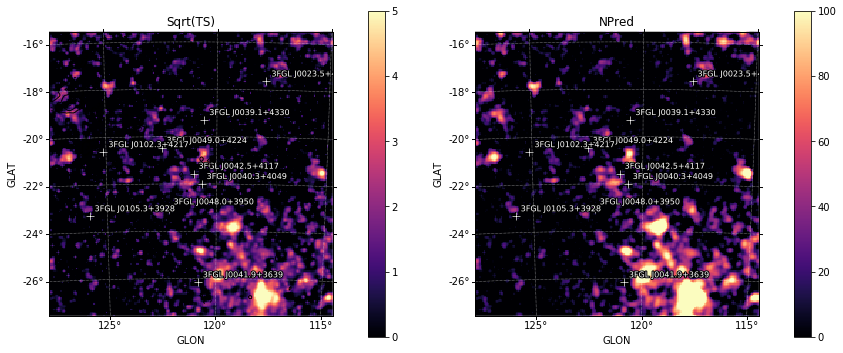

In [40]:
tsmap_postfit = gta.tsmap(prefix='TSmap_start',make_plots=True,write_fits=True,write_npy=True)
%matplotlib inline
fig = plt.figure(figsize=(14,6))
ROIPlotter(tsmap_postfit['sqrt_ts'],roi=gta.roi).plot(levels=[0,3,5,7],vmin=0,vmax=5,subplot=121,cmap='magma')
plt.gca().set_title('Sqrt(TS)')
ROIPlotter(tsmap_postfit['npred'],roi=gta.roi).plot(vmin=0,vmax=100,subplot=122,cmap='magma')
plt.gca().set_title('NPred')

2018-03-31 17:35:41 INFO    GTAnalysis.residmap(): Generating residual maps
2018-03-31 17:35:41 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2018-03-31 17:35:45 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2018-03-31 17:35:50 INFO    GTAnalysis.residmap(): Finished residual maps
2018-03-31 17:35:51 INFO    GTAnalysis.residmap(): Execution time: 10.04 s


Text(0.5,1,u'Excess')

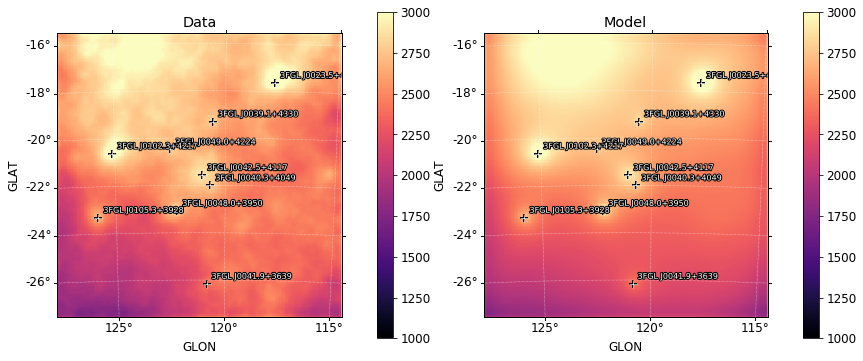

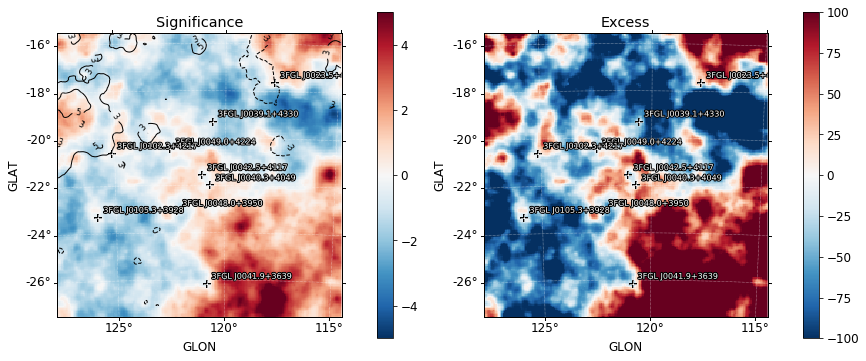

In [41]:
resid = gta.residmap('SMC_postfit',model={'SpatialModel' : 'PointSource', 'Index' : 2.0},write_fits=True,write_npy=True,make_plots=True)
fig = plt.figure(figsize=(14,6))
ROIPlotter(resid['data'],roi=gta.roi).plot(vmin=1000,vmax=3000,subplot=121,cmap='magma')
plt.gca().set_title('Data')
ROIPlotter(resid['model'],roi=gta.roi).plot(vmin=1000,vmax=3000,subplot=122,cmap='magma')
plt.gca().set_title('Model')

fig = plt.figure(figsize=(14,6))
ROIPlotter(resid['sigma'],roi=gta.roi).plot(vmin=-5,vmax=5,levels=[-5,-3,3,5],subplot=121,cmap='RdBu_r')
plt.gca().set_title('Significance')
ROIPlotter(resid['excess'],roi=gta.roi).plot(vmin=-100,vmax=100,subplot=122,cmap='RdBu_r')
plt.gca().set_title('Excess')

2018-03-31 17:35:57 INFO    GTBinnedAnalysis.write_xml(): Writing /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/relocalization_00.xml...
2018-03-31 17:35:57 INFO    GTAnalysis.write_fits(): Writing /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/relocalization.fits...
2018-03-31 17:35:59 INFO    GTBinnedAnalysis.write_model_map(): Generating model map for component 00.
2018-03-31 17:36:03 INFO    GTAnalysis.write_roi(): Writing /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/relocalization.npy...


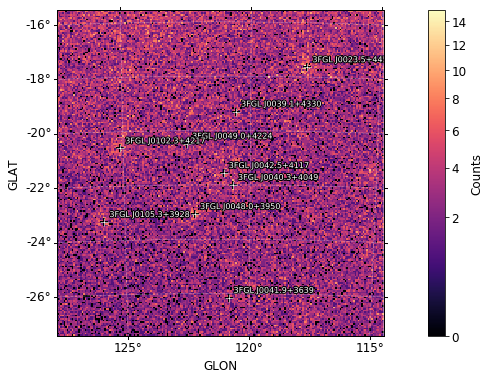

In [42]:
gta.write_roi('relocalization',make_plots=True,save_model_map=True)

In [48]:
gta.load_roi('relocalization')

2018-03-31 17:47:21 INFO    GTAnalysis.load_roi(): Loading ROI file: /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/relocalization.npy
2018-03-31 17:47:21 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2018-03-31 17:47:49 INFO    GTAnalysis.load_roi(): Finished Loading ROI


# Source Extension

Now we will run the extension to all sources using gta.extension.

In [43]:
help(gta.extension)

Help on method extension in module fermipy.extension:

extension(self, name, **kwargs) method of fermipy.gtanalysis.GTAnalysis instance
    Test this source for spatial extension with the likelihood
    ratio method (TS_ext).  This method will substitute an
    extended spatial model for the given source and perform a
    one-dimensional scan of the spatial extension parameter over
    the range specified with the width parameters.  The 1-D
    profile likelihood is then used to compute the best-fit value,
    upper limit, and TS for extension.  The nuisance parameters
    that will be simultaneously fit when performing the spatial
    scan can be controlled with the ``fix_shape``,
    ``free_background``, and ``free_radius`` options.  By default
    the position of the source will be fixed to its current
    position.  A simultaneous fit to position and extension can be
    performed by setting ``fit_position`` to True.
    
    Parameters
    ----------
    name : str
        Source 

We use the option update=True and sqrt_ts_threshold=3.0 that will update the spatial template of the source if the TS of extension larger than 9.

In [49]:
extension_best = np.zeros(len(gta.roi.sources))
extension_error = np.zeros(len(gta.roi.sources))
extension_ul = np.zeros(len(gta.roi.sources))
extension_TS = np.zeros(len(gta.roi.sources))

for t in range(len(gta.roi.sources)-2):
    print ""
    print "Running extension on source %s"%gta.roi.sources[t].name
    print ""
    gta.free_sources(free=False)
    gta.print_model()
    gta.free_sources(skydir=gta.roi[gta.roi.sources[t].name].skydir,distance=[3.0],free=True)
    gta.print_model()
    extension = gta.extension(gta.roi.sources[t].name, update=True, width_max=5.0, sqrt_ts_threshold=3.0)
    extension_best[t] = extension['ext']
    extension_error[t] = extension['ext_err']
    extension_ul[t] = extension['ext_ul95']
    extension_TS[t] = extension['ts_ext']
    print "%.3f %.3f %.3f %.3f"%(extension['ext'],extension['ext_err'],extension['ext_ul95'],extension['ts_ext'])
    gta.print_model()

2018-03-31 17:48:28 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0023.5+4454     : ['Prefactor', 'Index']
2018-03-31 17:48:28 INFO    GTAnalysis.free_source(): Fixing parameters for galdiff               : ['Prefactor', 'Index']
2018-03-31 17:48:28 INFO    GTAnalysis.free_source(): Fixing parameters for isodiff               : ['Normalization']
2018-03-31 17:48:28 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.120   2.114  1.47e-06   2.78     89.71       615.7     
3FGL J0040.3+4049      0.629   0.205  1.83e-06   1.77     65.21       130.0     
3FGL J0049.0+4224      1.641   0.362  1.21e-06   1.82     35.85       102.3     
3FGL J0048.0+3950      1.770   0.560  5.75e-06   1.91    467.55       625.3     
3FGL J0039.1+4330      2.342   0.259  1.51e-06   1.98     68.40       205.8     
3FGL J0102.3+4


Renormalization of source 3FGL J0042.5+4117



2018-03-31 17:49:02 INFO    GTAnalysis._extension(): Fitting extended-source model.
2018-03-31 17:49:27 INFO    GTAnalysis._extension(): Generating TS map.
2018-03-31 17:49:47 INFO    GTAnalysis._extension(): Testing point-source model.
2018-03-31 17:50:17 INFO    GTAnalysis._extension(): Best-fit extension: 0.5487 + 0.1008 - 0.1096
2018-03-31 17:50:17 INFO    GTAnalysis._extension(): TS_ext:        16.534
2018-03-31 17:50:17 INFO    GTAnalysis._extension(): Extension UL: 0.7142
2018-03-31 17:50:17 INFO    GTAnalysis._extension(): LogLike:  -241407.731 DeltaLogLike:        6.308
2018-03-31 17:50:17 INFO    GTAnalysis.extension(): Finished extension fit.
2018-03-31 17:50:18 INFO    GTAnalysis.extension(): Execution time: 109.73 s
2018-03-31 17:50:18 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.120   2.736  2.57e-

0.549 0.105 0.714 16.534

Renormalization of source 3FGL J0040.3+4049



2018-03-31 17:50:57 INFO    GTAnalysis._extension(): Fitting extended-source model.
2018-03-31 17:51:28 INFO    GTAnalysis._extension(): Generating TS map.
2018-03-31 17:51:36 INFO    GTAnalysis._extension(): Testing point-source model.
/nfs/slac/kipac/fs1/u/mdimauro/software/fermipy/fermipy/extension.py:277: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(o['ts_ext']) > sqrt_ts_threshold):
2018-03-31 17:51:41 INFO    GTAnalysis._extension(): Best-fit extension: 0.0040 + 0.0328 -    nan
2018-03-31 17:51:41 INFO    GTAnalysis._extension(): TS_ext:        -0.006
2018-03-31 17:51:41 INFO    GTAnalysis._extension(): Extension UL: 0.0588
2018-03-31 17:51:41 INFO    GTAnalysis._extension(): LogLike:  -241406.622 DeltaLogLike:        1.109
2018-03-31 17:51:41 INFO    GTAnalysis.extension(): Finished extension fit.
2018-03-31 17:51:41 INFO    GTAnalysis.extension(): Execution time: 83.56 s
2018-03-31 17:51:41 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  

0.004 0.033 0.059 -0.006

Renormalization of source 3FGL J0049.0+4224



2018-03-31 17:52:21 INFO    GTAnalysis._extension(): Fitting extended-source model.
2018-03-31 17:52:49 INFO    GTAnalysis._extension(): Generating TS map.
2018-03-31 17:52:57 INFO    GTAnalysis._extension(): Testing point-source model.
2018-03-31 17:53:02 INFO    GTAnalysis._extension(): Best-fit extension: 0.0543 + 0.0376 -    nan
2018-03-31 17:53:02 INFO    GTAnalysis._extension(): TS_ext:        0.500
2018-03-31 17:53:02 INFO    GTAnalysis._extension(): Extension UL: 0.1209
2018-03-31 17:53:02 INFO    GTAnalysis._extension(): LogLike:  -241407.443 DeltaLogLike:        0.288
2018-03-31 17:53:02 INFO    GTAnalysis.extension(): Finished extension fit.
2018-03-31 17:53:02 INFO    GTAnalysis.extension(): Execution time: 80.87 s
2018-03-31 17:53:02 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.120   2.736  2.57e-06

0.054 0.038 0.121 0.500

Renormalization of source 3FGL J0048.0+3950



2018-03-31 17:53:38 INFO    GTAnalysis._extension(): Fitting extended-source model.
2018-03-31 17:54:03 INFO    GTAnalysis._extension(): Generating TS map.
2018-03-31 17:54:12 INFO    GTAnalysis._extension(): Testing point-source model.
2018-03-31 17:54:17 INFO    GTAnalysis._extension(): Best-fit extension: 0.0362 + 0.0258 -    nan
2018-03-31 17:54:17 INFO    GTAnalysis._extension(): TS_ext:        0.111
2018-03-31 17:54:17 INFO    GTAnalysis._extension(): Extension UL: 0.0749
2018-03-31 17:54:17 INFO    GTAnalysis._extension(): LogLike:  -241407.551 DeltaLogLike:        0.179
2018-03-31 17:54:17 INFO    GTAnalysis.extension(): Finished extension fit.
2018-03-31 17:54:17 INFO    GTAnalysis.extension(): Execution time: 74.61 s
2018-03-31 17:54:17 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.120   2.736  2.57e-06

0.036 0.026 0.075 0.111

Renormalization of source 3FGL J0039.1+4330



2018-03-31 17:54:56 INFO    GTAnalysis._extension(): Fitting extended-source model.
2018-03-31 17:55:26 INFO    GTAnalysis._extension(): Generating TS map.
2018-03-31 17:55:34 INFO    GTAnalysis._extension(): Testing point-source model.
2018-03-31 17:55:39 INFO    GTAnalysis._extension(): Best-fit extension: 0.0032 + 0.0332 -    nan
2018-03-31 17:55:39 INFO    GTAnalysis._extension(): TS_ext:        -0.009
2018-03-31 17:55:39 INFO    GTAnalysis._extension(): Extension UL: 0.0570
2018-03-31 17:55:39 INFO    GTAnalysis._extension(): LogLike:  -241407.729 DeltaLogLike:        0.002
2018-03-31 17:55:39 INFO    GTAnalysis.extension(): Finished extension fit.
2018-03-31 17:55:39 INFO    GTAnalysis.extension(): Execution time: 82.39 s
2018-03-31 17:55:39 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.120   2.736  2.57e-0

0.003 0.033 0.057 -0.009

Renormalization of source 3FGL J0102.3+4217



2018-03-31 17:56:16 INFO    GTAnalysis._extension(): Fitting extended-source model.
2018-03-31 17:56:43 INFO    GTAnalysis._extension(): Generating TS map.
2018-03-31 17:56:51 INFO    GTAnalysis._extension(): Testing point-source model.
2018-03-31 17:56:56 INFO    GTAnalysis._extension(): Best-fit extension: 0.0192 + 0.0477 -    nan
2018-03-31 17:56:56 INFO    GTAnalysis._extension(): TS_ext:        0.051
2018-03-31 17:56:56 INFO    GTAnalysis._extension(): Extension UL: 0.0955
2018-03-31 17:56:56 INFO    GTAnalysis._extension(): LogLike:  -241407.682 DeltaLogLike:        0.048
2018-03-31 17:56:56 INFO    GTAnalysis.extension(): Finished extension fit.
2018-03-31 17:56:56 INFO    GTAnalysis.extension(): Execution time: 76.79 s
2018-03-31 17:56:56 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.120   2.736  2.57e-06

0.019 0.048 0.095 0.051

Renormalization of source 3FGL J0041.9+3639



2018-03-31 17:57:29 INFO    GTAnalysis._extension(): Fitting extended-source model.
2018-03-31 17:57:53 INFO    GTAnalysis._extension(): Generating TS map.
2018-03-31 17:59:51 INFO    GTAnalysis._extension(): Testing point-source model.
2018-03-31 17:59:56 INFO    GTAnalysis._extension(): Best-fit extension: 2.1340 + 0.3102 - 0.2841
2018-03-31 17:59:56 INFO    GTAnalysis._extension(): TS_ext:        3.890
2018-03-31 17:59:56 INFO    GTAnalysis._extension(): Extension UL: 2.6857
2018-03-31 17:59:56 INFO    GTAnalysis._extension(): LogLike:  -241405.986 DeltaLogLike:        1.745
2018-03-31 17:59:56 INFO    GTAnalysis.extension(): Finished extension fit.
2018-03-31 17:59:56 INFO    GTAnalysis.extension(): Execution time: 180.22 s
2018-03-31 17:59:56 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.120   2.736  2.57e-0

2.134 0.297 2.686 3.890

Renormalization of source 3FGL J0105.3+3928



2018-03-31 18:00:33 INFO    GTAnalysis._extension(): Fitting extended-source model.
2018-03-31 18:00:58 INFO    GTAnalysis._extension(): Generating TS map.
2018-03-31 18:01:06 INFO    GTAnalysis._extension(): Testing point-source model.
2018-03-31 18:01:10 INFO    GTAnalysis._extension(): Best-fit extension: 0.0719 + 0.0380 - 0.0425
2018-03-31 18:01:10 INFO    GTAnalysis._extension(): TS_ext:        1.572
2018-03-31 18:01:10 INFO    GTAnalysis._extension(): Extension UL: 0.1360
2018-03-31 18:01:10 INFO    GTAnalysis._extension(): LogLike:  -241406.866 DeltaLogLike:        0.865
2018-03-31 18:01:10 INFO    GTAnalysis.extension(): Finished extension fit.
2018-03-31 18:01:10 INFO    GTAnalysis.extension(): Execution time: 74.01 s
2018-03-31 18:01:10 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.120   2.736  2.57e-06

0.072 0.040 0.136 1.572

Renormalization of source 3FGL J0023.5+4454



2018-03-31 18:01:45 INFO    GTAnalysis._extension(): Fitting extended-source model.
2018-03-31 18:02:09 INFO    GTAnalysis._extension(): Generating TS map.
2018-03-31 18:02:17 INFO    GTAnalysis._extension(): Testing point-source model.
2018-03-31 18:02:21 INFO    GTAnalysis._extension(): Best-fit extension: 0.0824 + 0.0421 - 0.0394
2018-03-31 18:02:21 INFO    GTAnalysis._extension(): TS_ext:        2.506
2018-03-31 18:02:21 INFO    GTAnalysis._extension(): Extension UL: 0.1495
2018-03-31 18:02:21 INFO    GTAnalysis._extension(): LogLike:  -241406.588 DeltaLogLike:        1.142
2018-03-31 18:02:21 INFO    GTAnalysis.extension(): Finished extension fit.
2018-03-31 18:02:21 INFO    GTAnalysis.extension(): Execution time: 70.83 s
2018-03-31 18:02:21 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.120   2.736  2.57e-06

0.082 0.041 0.150 2.506


In [57]:
print "Ext_best  Ext_err  Ext_UL  TS_ext"
for t in range(len(gta.roi.sources)-2):
    print "%.3f     %.3f    %.3f   %.3f"%(extension_best[t],extension_error[t],extension_ul[t],extension_TS[t])

Ext_best  Ext_err  Ext_UL  TS_ext
0.549     0.105    0.714   16.534
0.004     0.033    0.059   -0.006
0.054     0.038    0.121   0.500
0.036     0.026    0.075   0.111
0.003     0.033    0.057   -0.009
0.019     0.048    0.095   0.051
2.134     0.297    2.686   3.890
0.072     0.040    0.136   1.572
0.082     0.041    0.150   2.506


So the only source for which we have found an extension is 3FGL J0042.5+4117 

Let's calculate the TS map and the residual map.

2018-03-31 18:08:16 INFO    GTAnalysis.tsmap(): Generating TS map
2018-03-31 18:08:22 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2018-03-31 18:13:24 INFO    GTAnalysis.tsmap(): Finished TS map
2018-03-31 18:13:24 INFO    GTAnalysis.tsmap(): Execution time: 308.24 s


Text(0.5,1,u'NPred')

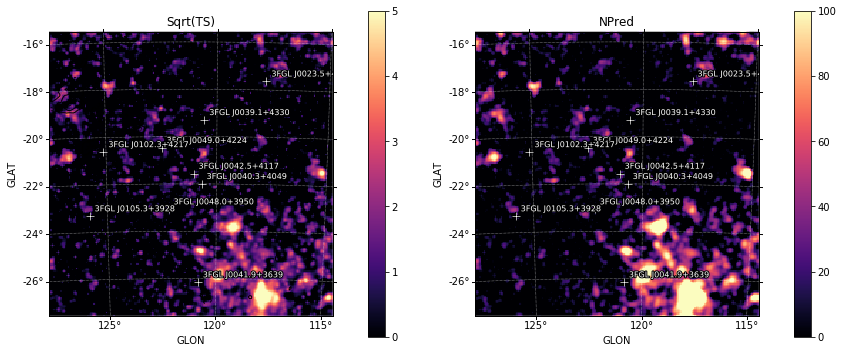

In [58]:
tsmap_postfit = gta.tsmap(prefix='TSmap_ext',make_plots=True,write_fits=True,write_npy=True)
%matplotlib inline
fig = plt.figure(figsize=(14,6))
ROIPlotter(tsmap_postfit['sqrt_ts'],roi=gta.roi).plot(levels=[0,3,5,7],vmin=0,vmax=5,subplot=121,cmap='magma')
plt.gca().set_title('Sqrt(TS)')
ROIPlotter(tsmap_postfit['npred'],roi=gta.roi).plot(vmin=0,vmax=100,subplot=122,cmap='magma')
plt.gca().set_title('NPred')

2018-03-31 18:14:33 INFO    GTAnalysis.residmap(): Generating residual maps
2018-03-31 18:14:33 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2018-03-31 18:14:38 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2018-03-31 18:14:43 INFO    GTAnalysis.residmap(): Finished residual maps
2018-03-31 18:14:43 INFO    GTAnalysis.residmap(): Execution time: 9.98 s


Text(0.5,1,u'Excess')

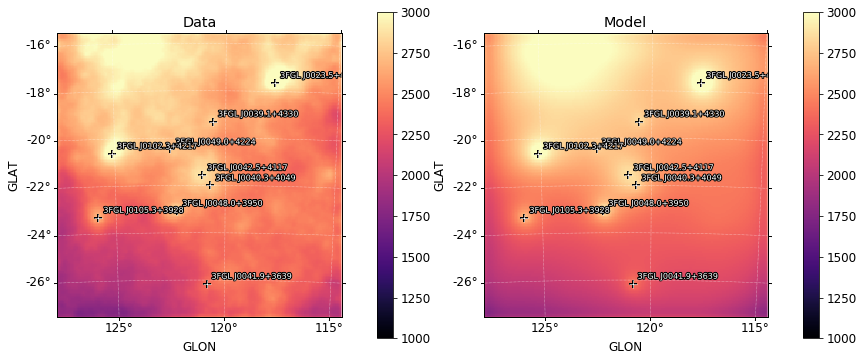

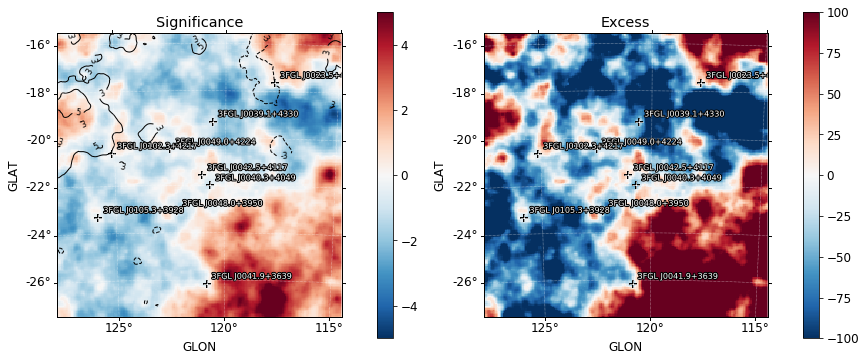

In [59]:
resid = gta.residmap('Residual_ext',model={'SpatialModel' : 'PointSource', 'Index' : 2.0},write_fits=True,write_npy=True,make_plots=True)
fig = plt.figure(figsize=(14,6))
ROIPlotter(resid['data'],roi=gta.roi).plot(vmin=1000,vmax=3000,subplot=121,cmap='magma')
plt.gca().set_title('Data')
ROIPlotter(resid['model'],roi=gta.roi).plot(vmin=1000,vmax=3000,subplot=122,cmap='magma')
plt.gca().set_title('Model')

fig = plt.figure(figsize=(14,6))
ROIPlotter(resid['sigma'],roi=gta.roi).plot(vmin=-5,vmax=5,levels=[-5,-3,3,5],subplot=121,cmap='RdBu_r')
plt.gca().set_title('Significance')
ROIPlotter(resid['excess'],roi=gta.roi).plot(vmin=-100,vmax=100,subplot=122,cmap='RdBu_r')
plt.gca().set_title('Excess')

2018-03-31 18:14:49 INFO    GTBinnedAnalysis.write_xml(): Writing /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/extension_00.xml...
2018-03-31 18:14:49 INFO    GTAnalysis.write_fits(): Writing /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/extension.fits...
2018-03-31 18:14:51 INFO    GTBinnedAnalysis.write_model_map(): Generating model map for component 00.
2018-03-31 18:14:55 INFO    GTAnalysis.write_roi(): Writing /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/extension.npy...


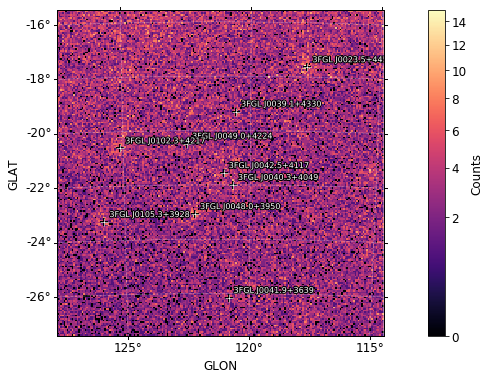

In [60]:
gta.write_roi('extension',make_plots=True,save_model_map=True)

# Find new sources

After we have renormalized the 3FGL sources and we have found if the sources are extended, we will try to find new sources with the tool find_sources(). 

find_sources() is an iterative source-finding algorithm that uses peak detection on a TS map to find new source candidates. The procedure for adding new sources at each iteration is as follows:
Generate a TS map for the test source model defined with the model argument.
Identify peaks with sqrt(TS) > sqrt_ts_threshold and an angular distance of at least min_separation from a higher amplitude peak in the map.
Order the peaks by TS and add a source at each peak starting from the highest TS peak. Set the source position by fitting a 2D parabola to the log-likelihood surface around the peak maximum. After adding each source, re-fit its spectral parameters.
Add sources at the N highest peaks up to N = sources_per_iter.
Source finding is repeated up to max_iter iterations or until no peaks are found in a given iteration. Sources found by the method are added to the model and given designations PS JXXXX.X+XXXX according to their position in celestial coordinates.

In [61]:
gta.free_sources()
findsource = gta.find_sources(sqrt_ts_threshold=5,min_separation=0.2,tsmap_fitter='tsmap')

2018-03-31 18:15:16 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0042.5+4117     : ['Prefactor', 'Index']
2018-03-31 18:15:17 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0040.3+4049     : ['Prefactor', 'Index']
2018-03-31 18:15:17 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0049.0+4224     : ['Prefactor', 'Index']
2018-03-31 18:15:17 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0048.0+3950     : ['Prefactor', 'Index']
2018-03-31 18:15:17 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0039.1+4330     : ['Prefactor', 'Index']
2018-03-31 18:15:17 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0102.3+4217     : ['Prefactor', 'Index']
2018-03-31 18:15:17 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0041.9+3639     : ['Prefactor', 'Index']
2018-03-31 18:15:17 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0105.3+3928     : ['Prefactor', 'Index']
2018-03-

2018-03-31 18:30:14 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2018-03-31 18:30:14 INFO    GTAnalysis.fit(): LogLike:  -241253.524 DeltaLogLike:        7.106 
2018-03-31 18:30:14 INFO    GTAnalysis._find_sources_iterate(): {'Index': {'error': 0.17992697924935233, 'value': -2.6334199693892013},
 'Prefactor': {'error': 5.0946961955898186e-14,
               'value': 2.9455049191636714e-13},
 'Scale': {'error': nan, 'value': 1000.0}}
2018-03-31 18:30:14 INFO    GTAnalysis.free_source(): Fixing parameters for PS J0013.6+4051       : ['Prefactor', 'Index']
2018-03-31 18:30:14 INFO    GTAnalysis._find_sources_iterate(): Performing spectral fit for PS J0015.3+3537.
2018-03-31 18:30:14 INFO    GTAnalysis.free_source(): Freeing parameters for PS J0015.3+3537       : ['Prefactor', 'Index']
2018-03-31 18:30:14 INFO    GTAnalysis.fit(): Starting fit.
2018-03-31 18:31:03 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2018-03-31 18:31

In [63]:
gta.print_model()

2018-03-31 18:40:02 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.120   3.224  2.97e-06   2.47    133.83       956.6    *
3FGL J0040.3+4049      0.629   0.207  2.03e-06   1.52     48.30        60.4    *
3FGL J0049.0+4224      1.641   0.369  1.22e-06   1.83     36.97       105.9    *
3FGL J0048.0+3950      1.770   0.560   5.8e-06   1.90    468.67       620.5    *
3FGL J0039.1+4330      2.342   0.271  1.52e-06   2.00     71.77       220.5    *
PS J0034.1+3855        2.865   2.767  1.07e-06   2.39     47.20       307.5     
PS J0041.4+3800        3.270   1.392  1.03e-06   2.00     43.27       140.3     
3FGL J0102.3+4217      3.802   0.797  2.07e-06   2.84    185.75       880.3    *
PS J0037.8+3650        4.531   3.024  1.03e-06   2.60     47.86       341.4     
3FGL J0041.9+3639      4.596   1.445  1.27e-06   2.06 

So 6 sources have been found with TS between about 20-50. 

2018-03-31 18:40:51 INFO    GTAnalysis.tsmap(): Generating TS map
2018-03-31 18:40:58 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2018-03-31 18:46:16 INFO    GTAnalysis.tsmap(): Finished TS map
2018-03-31 18:46:16 INFO    GTAnalysis.tsmap(): Execution time: 324.68 s


Text(0.5,1,u'NPred')

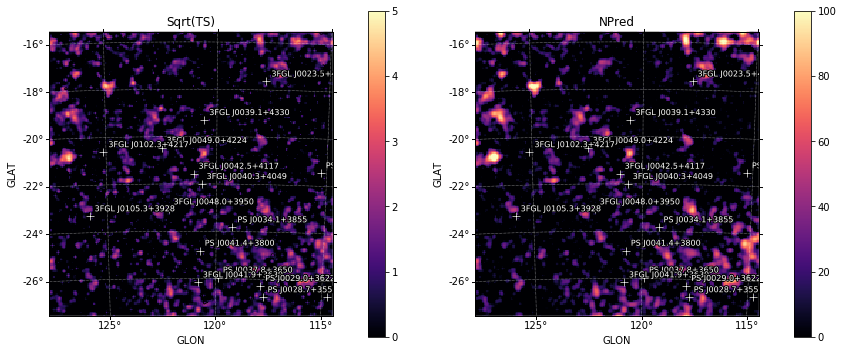

In [64]:
tsmap_postfit = gta.tsmap(prefix='TSmap_final',make_plots=True,write_fits=True,write_npy=True)
%matplotlib inline
fig = plt.figure(figsize=(14,6))
ROIPlotter(tsmap_postfit['sqrt_ts'],roi=gta.roi).plot(levels=[0,3,5,7],vmin=0,vmax=5,subplot=121,cmap='magma')
plt.gca().set_title('Sqrt(TS)')
ROIPlotter(tsmap_postfit['npred'],roi=gta.roi).plot(vmin=0,vmax=100,subplot=122,cmap='magma')
plt.gca().set_title('NPred')

2018-03-31 18:48:49 INFO    GTAnalysis.residmap(): Generating residual maps
2018-03-31 18:48:50 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2018-03-31 18:48:54 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2018-03-31 18:49:00 INFO    GTAnalysis.residmap(): Finished residual maps
2018-03-31 18:49:00 INFO    GTAnalysis.residmap(): Execution time: 10.49 s


Text(0.5,1,u'Excess')

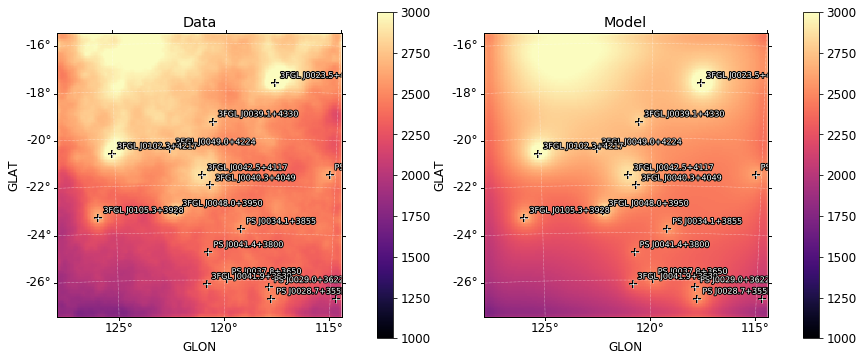

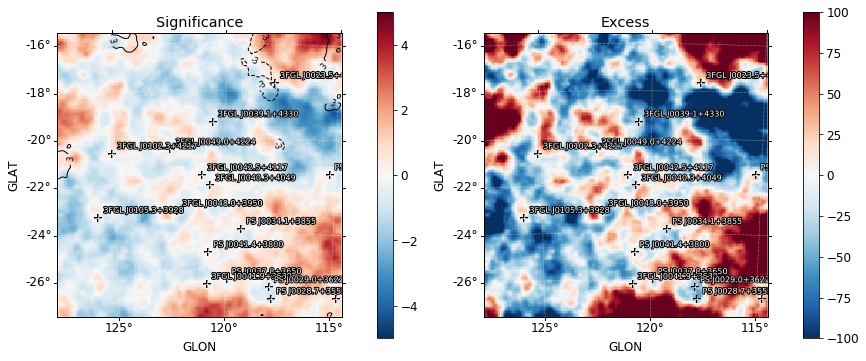

In [65]:
resid = gta.residmap('Residual_final',model={'SpatialModel' : 'PointSource', 'Index' : 2.0},write_fits=True,write_npy=True,make_plots=True)
fig = plt.figure(figsize=(14,6))
ROIPlotter(resid['data'],roi=gta.roi).plot(vmin=1000,vmax=3000,subplot=121,cmap='magma')
plt.gca().set_title('Data')
ROIPlotter(resid['model'],roi=gta.roi).plot(vmin=1000,vmax=3000,subplot=122,cmap='magma')
plt.gca().set_title('Model')

fig = plt.figure(figsize=(14,6))
ROIPlotter(resid['sigma'],roi=gta.roi).plot(vmin=-5,vmax=5,levels=[-5,-3,3,5],subplot=121,cmap='RdBu_r')
plt.gca().set_title('Significance')
ROIPlotter(resid['excess'],roi=gta.roi).plot(vmin=-100,vmax=100,subplot=122,cmap='RdBu_r')
plt.gca().set_title('Excess')

2018-03-31 18:49:54 INFO    GTBinnedAnalysis.write_xml(): Writing /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/rel_extension_TS25_00.xml...
2018-03-31 18:49:54 INFO    GTAnalysis.write_fits(): Writing /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/rel_extension_TS25.fits...
2018-03-31 18:49:56 INFO    GTBinnedAnalysis.write_model_map(): Generating model map for component 00.
2018-03-31 18:50:01 INFO    GTAnalysis.write_roi(): Writing /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/rel_extension_TS25.npy...


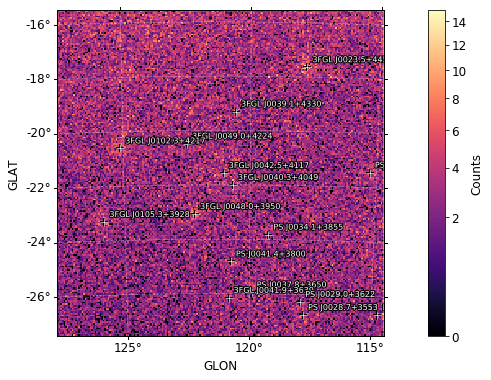

In [66]:
gta.write_roi('rel_extension_TS25',make_plots=True,save_model_map=True)

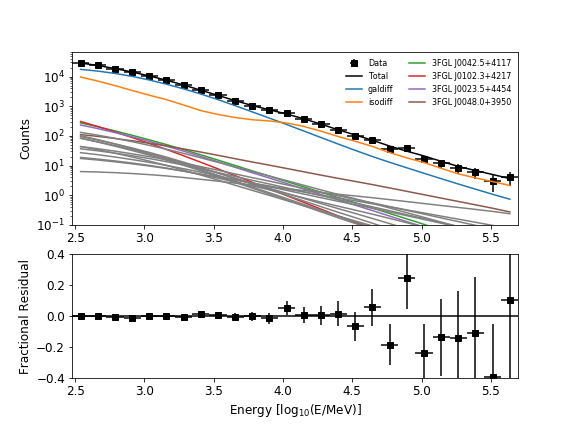

In [67]:
Image(filename='rel_extension_TS25_counts_spectrum.png') 

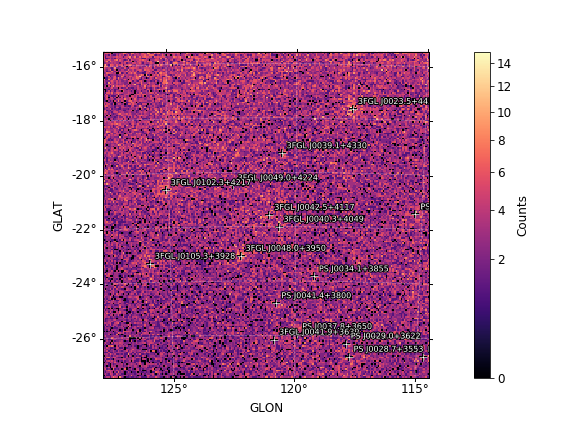

In [68]:
Image(filename='rel_extension_TS25_counts_map_2.477_5.699.png') 

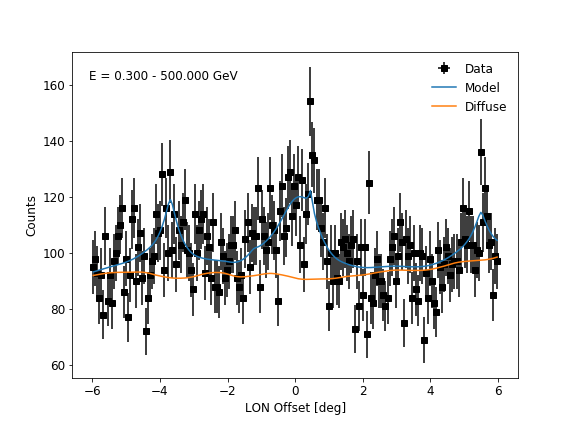

In [69]:
Image(filename='rel_extension_TS25_counts_map_xproj_2.477_5.699.png') 

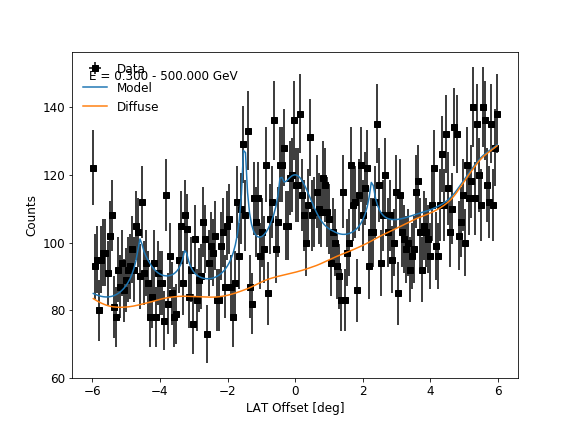

In [70]:
Image(filename='rel_extension_TS25_counts_map_yproj_2.477_5.699.png') 